In [ ]:
# adding a new holiday for summer break
# 1/6-31/8
# days from holiday for summer break will be taken from 1/7 for equality from left and right to the date.
# use it the same as the rest of the features

# check the option for starting a "timer"- check the average time for each cause to start a fire. 

In [1]:
import pandas as pd

In [2]:
wildfire_df = pd.read_csv("data.csv")
holiday_dates_df = pd.read_csv(f"US Holiday Dates (2004-2021).csv")

In [3]:
wildfire_df.head(5)

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1464479,201104109,W-626311,FED,DOI-WFMI,BIA,USMTFBA,Fort Belknap Agency,MTFBA,...,A,48.40330,-108.28960,8.0,PRIVATE,MT,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xf8:p\xce\x88\x12[\...
1,1,1591094,201608816,SFO-NE-2012-16029,NONFED,ST-NASF,ST/C&L,USNENES,Nebraska Department of Forestry,NENFS,...,B,40.66846,-99.08913,14.0,MISSING/NOT SPECIFIED,NE,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc5PN\xb4\xc5X\...
2,2,944726,1072277,SWRA_VA_11300,NONFED,ST-VAVAS,ST/C&L,USVAVAS,Virginia Department of Forestry,VAVAS3,...,B,39.00000,-78.26920,14.0,MISSING/NOT SPECIFIED,VA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\x05\xa3\x92:\x91S\...
3,3,896277,1022153,SWRA_LA_24392,NONFED,ST-LALAS,ST/C&L,USLALAS,Louisiana Office of Forestry,LALAS1,...,B,30.99330,-89.86390,14.0,MISSING/NOT SPECIFIED,LA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc09#JwV\xc0\xf...
4,4,1269039,1673620,SFO-KY-20320089011,NONFED,ST-NASF,ST/C&L,USKYKYS,Kentucky Division of Forestry,KYKYS,...,B,37.26921,-84.34258,14.0,MISSING/NOT SPECIFIED,KY,Rockcastle,203.0,Rockcastle,b'\x00\x01\xad\x10\x00\x00\xdc\x10\xaa\xd4\xec...


The features we would like to use:
discovery_doy- to find distance from holiday
discovery_date
discovery_time

In [4]:
holiday_dates_df.head(5)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


We want to create a 'closest_holiday' and 'days_from_closest_holiday' columns
We need students vacations db too

In [6]:
# Re-import necessary libraries and reload data after code execution state reset
# import pandas as pd
from datetime import datetime, timedelta

# Load the holiday dates dataset
# holiday_dates_df = pd.read_csv('/mnt/data/US Holiday Dates (2004-2021).csv')

# Load the wildfire dataset
# wildfire_df = pd.read_excel('/mnt/data/data_1_test.xlsx')

# Convert 'Date' in holiday_dates_df to datetime objects
holiday_dates_df['Date'] = pd.to_datetime(holiday_dates_df['Date'])

# Create a dictionary to map each year to its holidays
holiday_dict = {}
for year in holiday_dates_df['Year'].unique():
    holiday_dict[year] = holiday_dates_df[holiday_dates_df['Year'] == year]

def find_nearest_holiday(fire_year, discovery_doy):
    if fire_year not in holiday_dict:
        return ("No Data", "No Data")
    year_holidays = holiday_dict[fire_year]
    fire_date = datetime(fire_year, 1, 1) + timedelta(days=discovery_doy - 1)
    nearest_holiday = None
    min_days_diff = float('inf')
    for _, row in year_holidays.iterrows():
        holiday_date = row['Date']
        diff = abs((fire_date - holiday_date).days)
        if diff < min_days_diff:
            min_days_diff = diff
            nearest_holiday = row['Holiday']
    return (nearest_holiday, min_days_diff)

# Apply the function to each row in the wildfire dataset
wildfire_df['nearest_holiday'], wildfire_df['days_from_closest_holiday'] = zip(*wildfire_df.apply(lambda row: find_nearest_holiday(row['FIRE_YEAR'], row['DISCOVERY_DOY']), axis=1))

# Save the updated dataframe to a new Excel file
# updated_file_path = '/mnt/data/updated_data_1_test.xlsx'
# wildfire_df.to_excel(updated_file_path, index=False)

# updated_file_path
wildfire_df.head(10)

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,nearest_holiday,days_from_closest_holiday
0,0,1464479,201104109,W-626311,FED,DOI-WFMI,BIA,USMTFBA,Fort Belknap Agency,MTFBA,...,-108.289600,8.0,PRIVATE,MT,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xf8:p\xce\x88\x12[\...,Labor Day Weekend,12
1,1,1591094,201608816,SFO-NE-2012-16029,NONFED,ST-NASF,ST/C&L,USNENES,Nebraska Department of Forestry,NENFS,...,-99.089130,14.0,MISSING/NOT SPECIFIED,NE,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc5PN\xb4\xc5X\...,Memorial Day,9
2,2,944726,1072277,SWRA_VA_11300,NONFED,ST-VAVAS,ST/C&L,USVAVAS,Virginia Department of Forestry,VAVAS3,...,-78.269200,14.0,MISSING/NOT SPECIFIED,VA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\x05\xa3\x92:\x91S\...,No Data,No Data
3,3,896277,1022153,SWRA_LA_24392,NONFED,ST-LALAS,ST/C&L,USLALAS,Louisiana Office of Forestry,LALAS1,...,-89.863900,14.0,MISSING/NOT SPECIFIED,LA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc09#JwV\xc0\xf...,No Data,No Data
4,4,1269039,1673620,SFO-KY-20320089011,NONFED,ST-NASF,ST/C&L,USKYKYS,Kentucky Division of Forestry,KYKYS,...,-84.342580,14.0,MISSING/NOT SPECIFIED,KY,Rockcastle,203.0,Rockcastle,b'\x00\x01\xad\x10\x00\x00\xdc\x10\xaa\xd4\xec...,Eastern Easter,9
5,5,1453845,20009452,MOSFM-11020,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00506,...,-94.926710,8.0,PRIVATE,MO,BARRY,9.0,Barry,b'\x00\x01\xad\x10\x00\x00\x10\xb8u7O\xbbW\xc0...,No Data,No Data
6,6,832173,953407,STATE_MS_93764,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MS South Central,...,-89.275600,14.0,MISSING/NOT SPECIFIED,MS,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xc0\xb1.n\xa3QV\xc0...,No Data,No Data
7,7,500074,537645,SFO-MN0349-920122,NONFED,ST-NASF,ST/C&L,USMNMNS,Minnesota Department of Natural Resources,MNMNS,...,-93.568452,14.0,MISSING/NOT SPECIFIED,MN,Mille Lacs,95.0,Mille Lacs,b'\x00\x01\xad\x10\x00\x00Hj\x91\x82adW\xc0\xe...,No Data,No Data
8,8,5332,5356,FS-1429214,FED,FS-FIRESTAT,FS,USMNSUF,Superior National Forest,0909,...,-90.999167,5.0,USFS,MN,31,31.0,Cook,b'\x00\x01\xad\x10\x00\x00\xcc\xb9\xc2X\xf2\xb...,4th of July,25
9,9,554703,596457,SFO-NJ0285-99_A051506,NONFED,ST-NASF,ST/C&L,USNJNJS,New Jersey Forest Fire Service,NJNJA,...,-74.491660,14.0,MISSING/NOT SPECIFIED,NJ,Passaic,31.0,Passaic,b'\x00\x01\xad\x10\x00\x00\x140\x81[w\x9fR\xc0...,No Data,No Data


C:\Users\User\AppData\Local\Temp\ipykernel_11684\1423861825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_df['days_from_closest_holiday'] = valid_data_df['days_from_closest_holiday'].astype(int).abs()


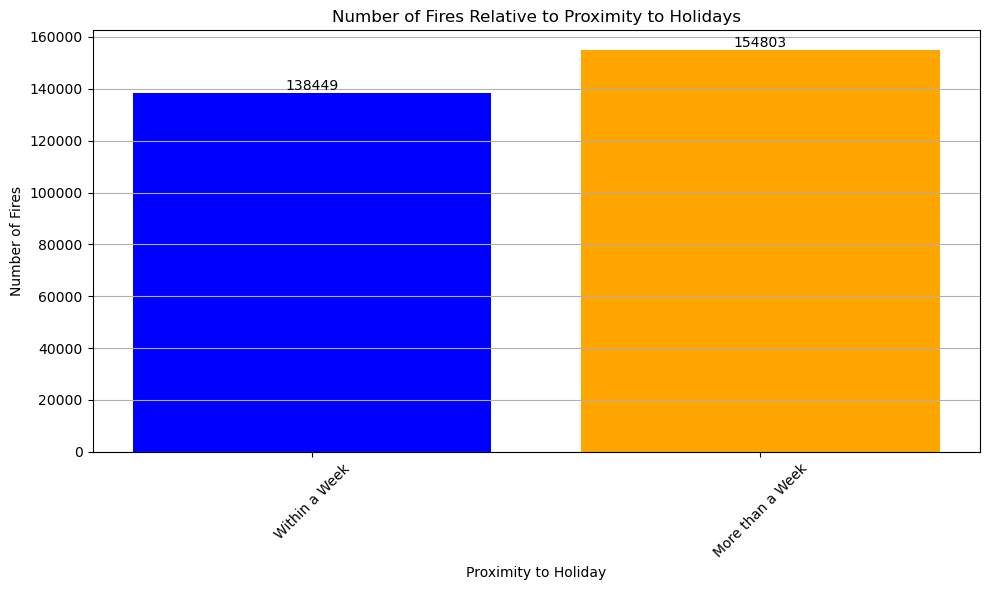

In [7]:
import matplotlib.pyplot as plt

# Filter out 'No Data' values from the 'days_from_closest_holiday' column
valid_data_df = wildfire_df[wildfire_df['days_from_closest_holiday'] != "No Data"]

# Convert 'days_from_closest_holiday' to absolute values and to integer for plotting
valid_data_df['days_from_closest_holiday'] = valid_data_df['days_from_closest_holiday'].astype(int).abs()

# Determine the number of fires within a week of a holiday and more than a week
within_week = valid_data_df[valid_data_df['days_from_closest_holiday'] <= 7]
more_than_week = valid_data_df[valid_data_df['days_from_closest_holiday'] > 7]

# Numbers for plotting
numbers = [len(within_week), len(more_than_week)]
labels = ['Within a Week', 'More than a Week']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, numbers, color=['blue', 'orange'])
plt.title('Number of Fires Relative to Proximity to Holidays')
plt.ylabel('Number of Fires')
plt.xlabel('Proximity to Holiday')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, count in enumerate(numbers):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

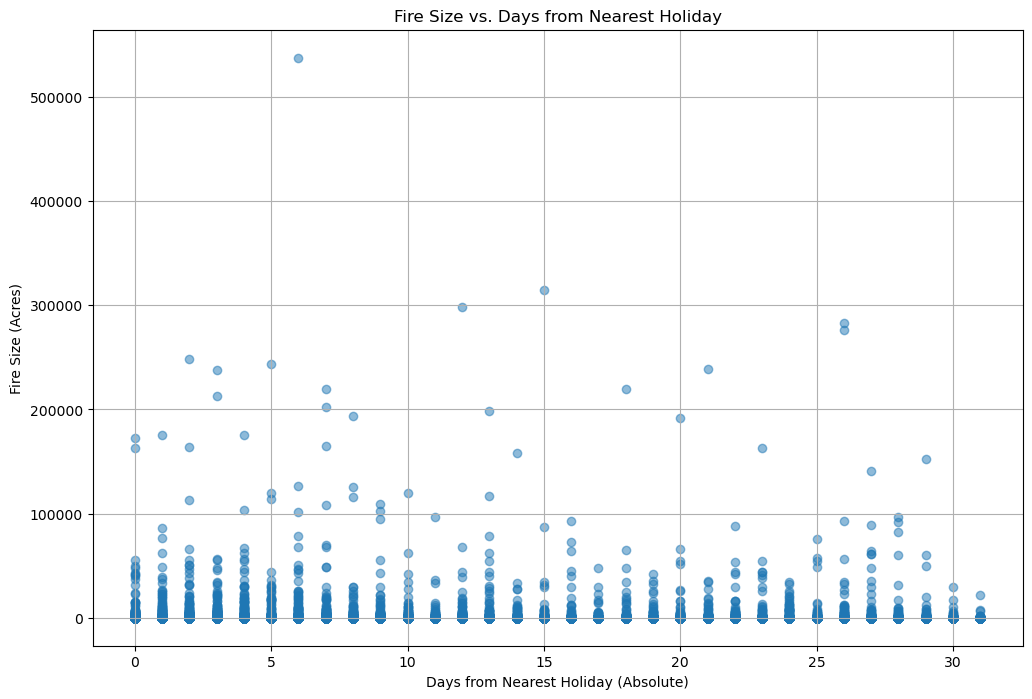

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(valid_data_df['days_from_closest_holiday'], valid_data_df['FIRE_SIZE'], alpha=0.5)
plt.title('Fire Size vs. Days from Nearest Holiday')
plt.xlabel('Days from Nearest Holiday (Absolute)')
plt.ylabel('Fire Size (Acres)')
plt.grid(True)
plt.show()

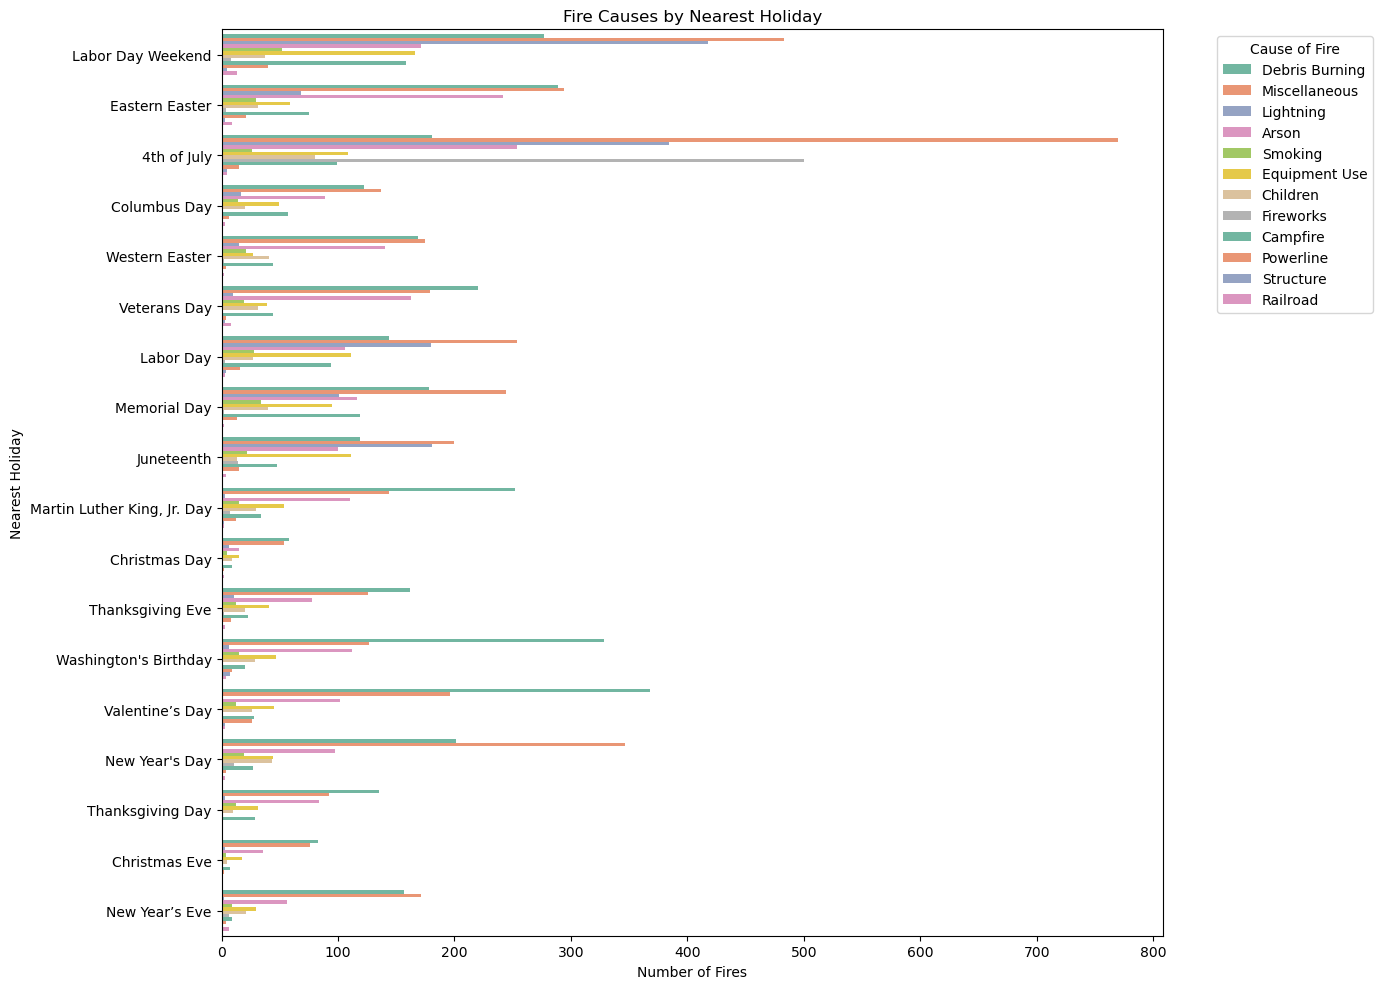

In [20]:
import seaborn as sns

# Filtering data to exclude 'No Data' values in 'nearest_holiday'
valid_holiday_data_df = valid_data_df[valid_data_df['nearest_holiday'] != "No Data"]
valid_holiday_data_df = valid_holiday_data_df[valid_data_df['days_from_closest_holiday'] < 1]

plt.figure(figsize=(14, 10))
sns.countplot(y='nearest_holiday', hue='STAT_CAUSE_DESCR', data=valid_holiday_data_df, palette='Set2')
plt.title('Fire Causes by Nearest Holiday')
plt.xlabel('Number of Fires')
plt.ylabel('Nearest Holiday')
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

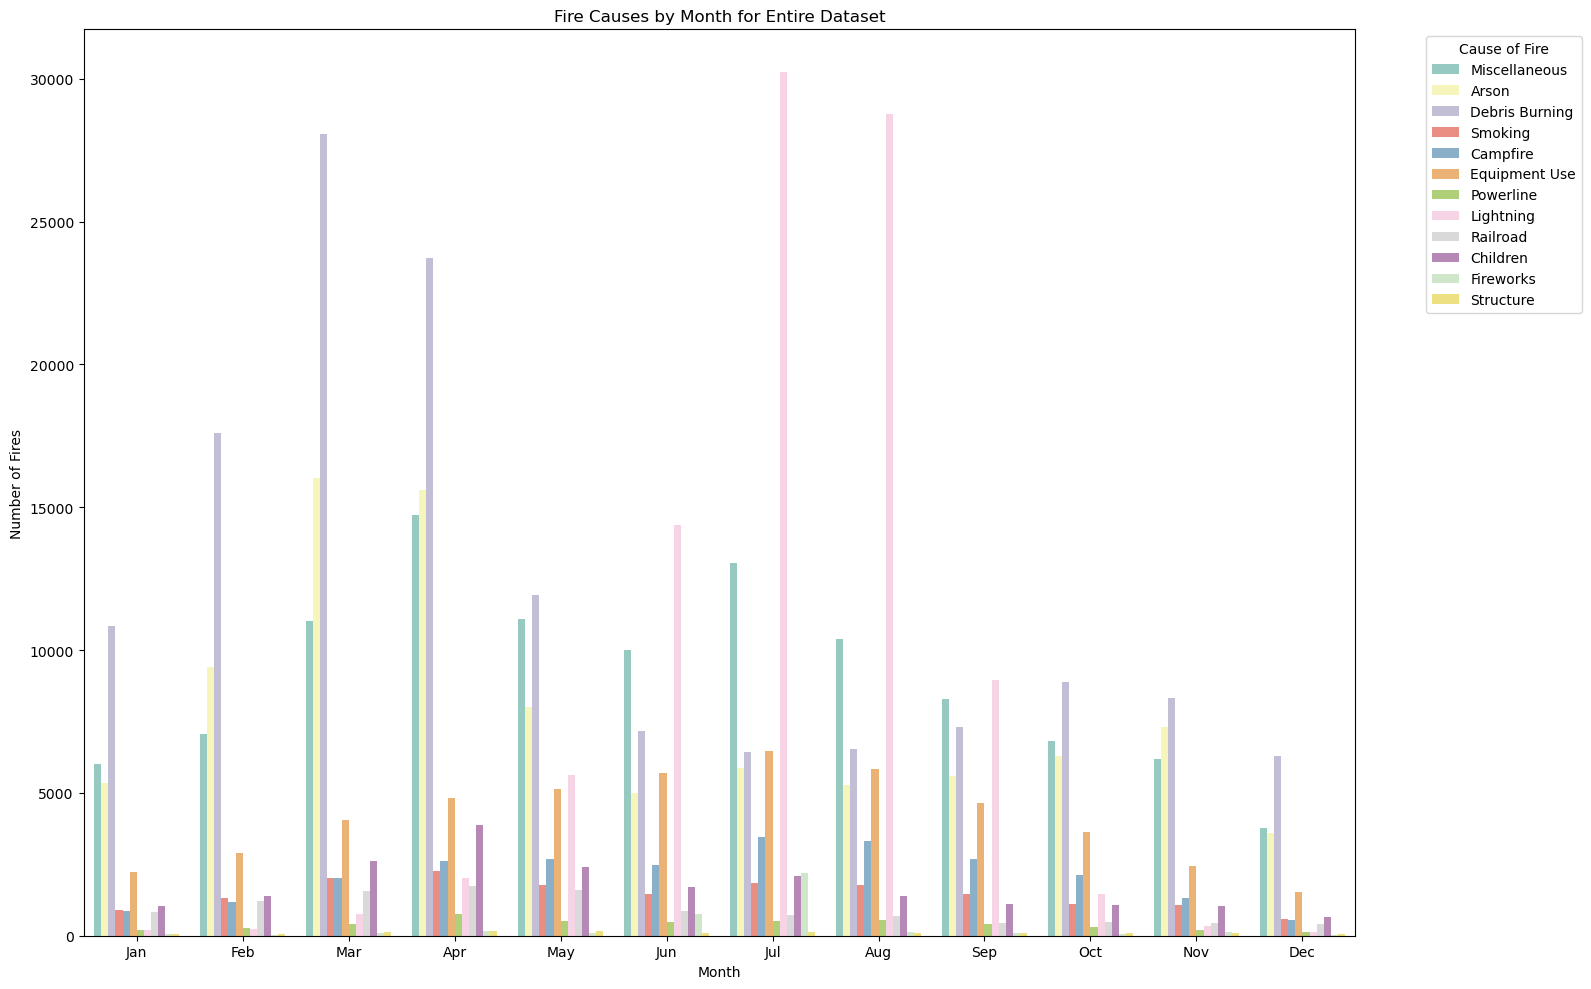

In [17]:
# Re-examining the data to ensure all months are included
# It's possible the filtering or data manipulation steps may have inadvertently excluded some data

# Ensure 'DISCOVERY_DATE' is correctly converted to datetime format for the whole wildfire dataset, not just the valid_data_df
wildfire_df['DISCOVERY_DATE'] = pd.to_datetime(wildfire_df['DISCOVERY_DATE'], unit='D', origin='julian')

# Extract the month from the 'DISCOVERY_DATE' for the entire dataset
wildfire_df['DISCOVERY_MONTH'] = wildfire_df['DISCOVERY_DATE'].dt.month

# Re-plot with the corrected dataset
plt.figure(figsize=(16, 10))
sns.countplot(x='DISCOVERY_MONTH', hue='STAT_CAUSE_DESCR', data=wildfire_df, palette='Set3')
plt.title('Fire Causes by Month for Entire Dataset')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


If the fire was during July or August, the probability that it was caused due to lightning struck is very high.

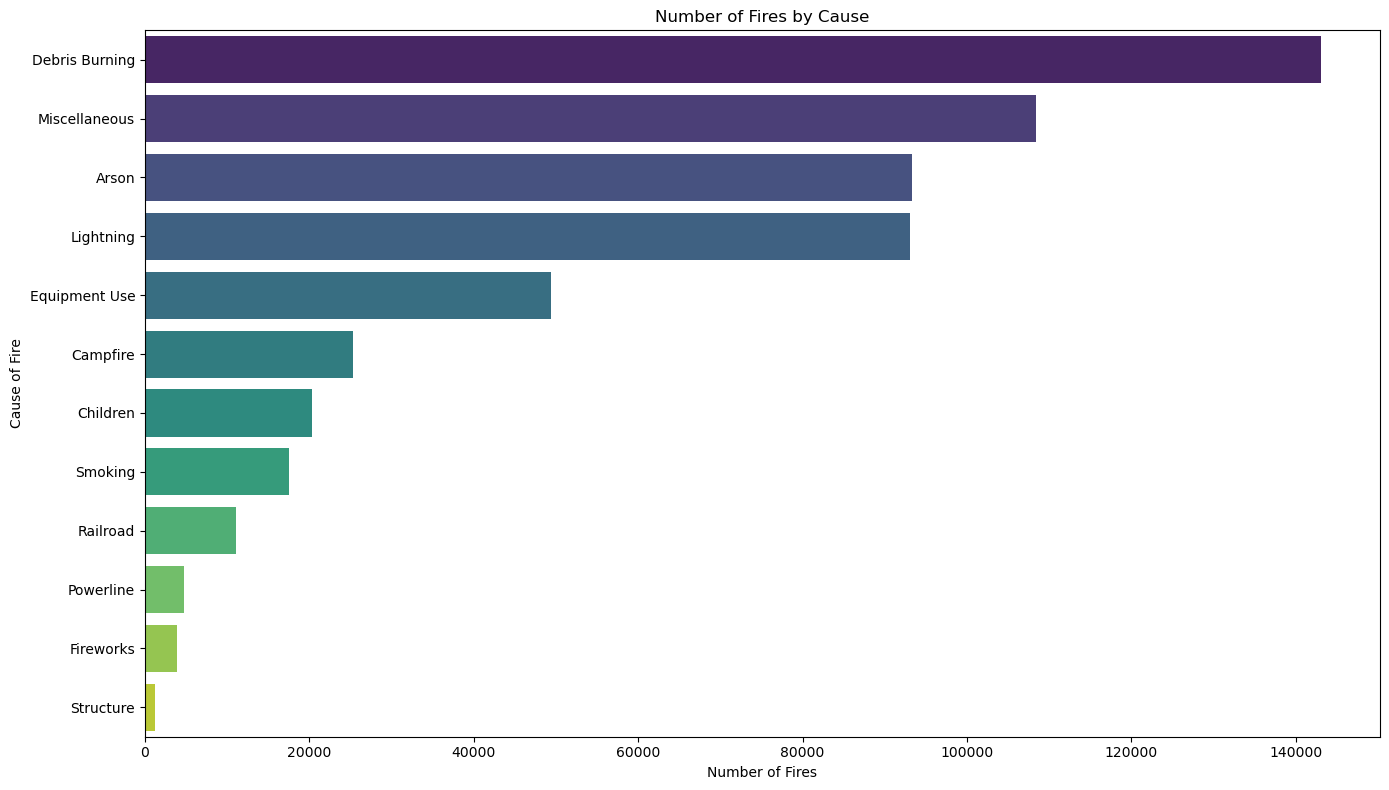

In [18]:
# Bar plot of all fire causes and their counts
plt.figure(figsize=(14, 8))
cause_counts = wildfire_df['STAT_CAUSE_DESCR'].value_counts()
sns.barplot(x=cause_counts.values, y=cause_counts.index, palette="viridis")
plt.title('Number of Fires by Cause')
plt.xlabel('Number of Fires')
plt.ylabel('Cause of Fire')
plt.tight_layout()
plt.show()

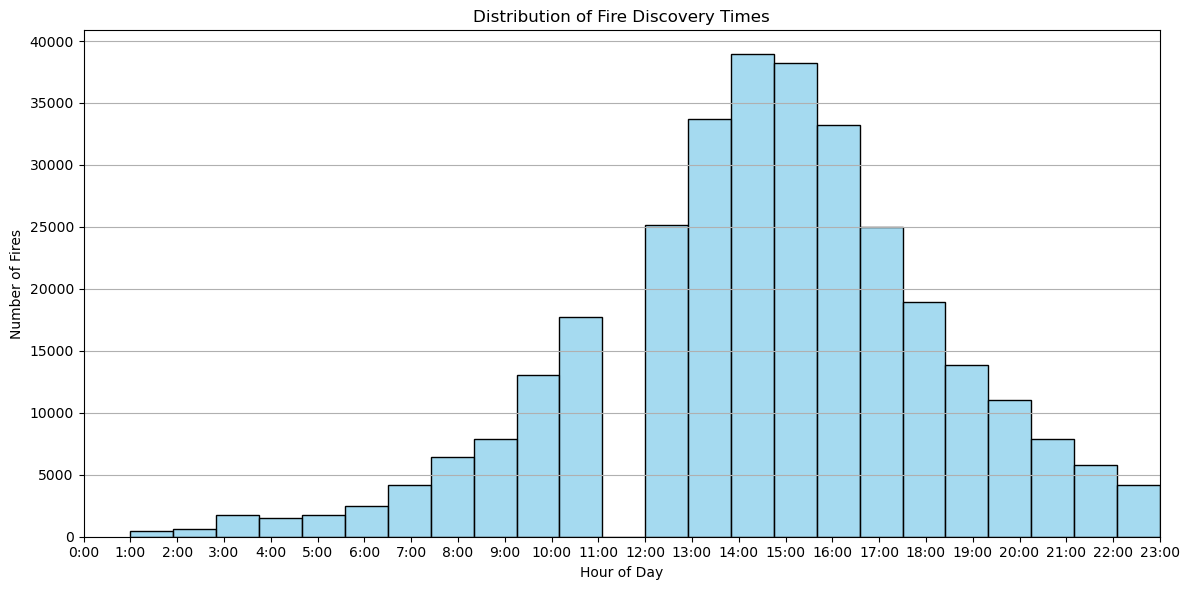

In [21]:
# Extract hour from 'DISCOVERY_TIME' if not already extracted
# Ensure 'DISCOVERY_TIME' is in a suitable format for extraction
wildfire_df['DISCOVERY_TIME'] = pd.to_datetime(wildfire_df['DISCOVERY_TIME'], errors='coerce', format='%H%M').dt.hour

# Plotting distribution of fire discovery times
plt.figure(figsize=(12, 6))
sns.histplot(wildfire_df['DISCOVERY_TIME'].dropna(), bins=24, kde=False, color='skyblue')
plt.title('Distribution of Fire Discovery Times')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fires')
plt.xlim(0, 23)
plt.xticks(range(0, 24), labels=[f"{hour}:00" for hour in range(0, 24)])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

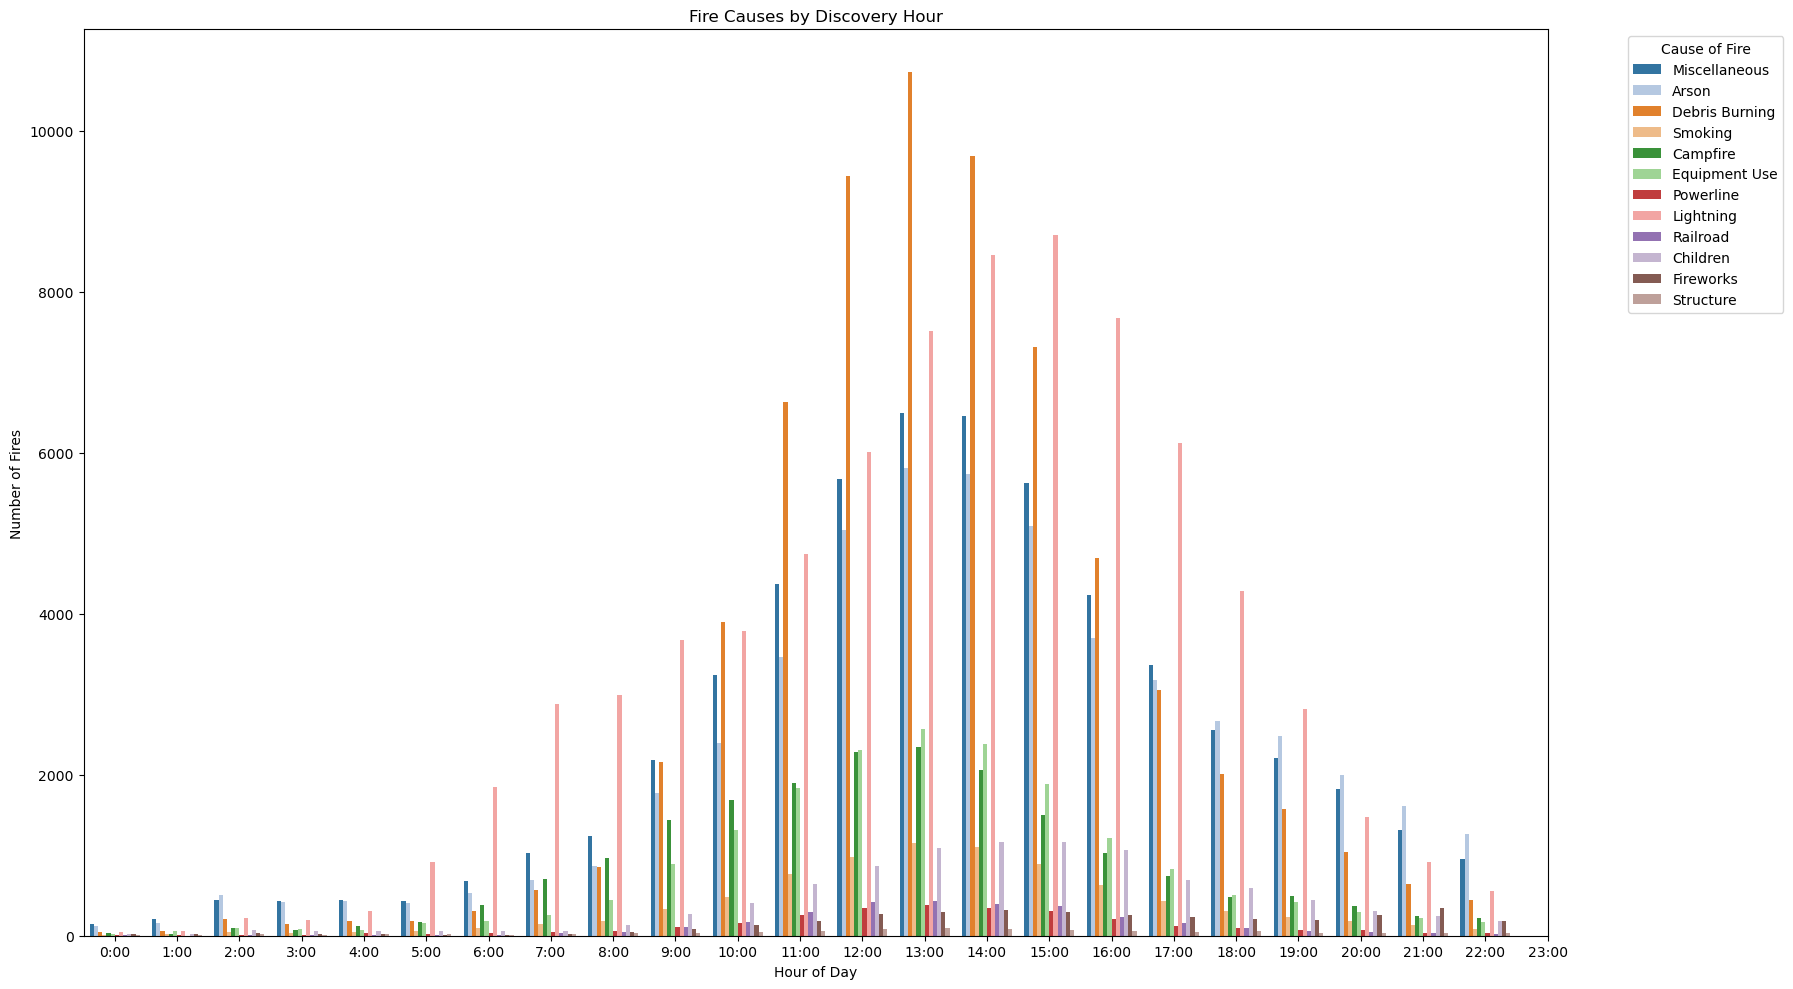

In [22]:
# To visualize the cause of fire by each hour of discovery, we'll use a count plot with hours on the x-axis and fire causes as hue

plt.figure(figsize=(18, 10))
sns.countplot(x='DISCOVERY_TIME', hue='STAT_CAUSE_DESCR', data=wildfire_df, palette='tab20')
plt.title('Fire Causes by Discovery Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fires')
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24), labels=[f"{hour}:00" for hour in range(0, 24)])
plt.tight_layout()
plt.show()

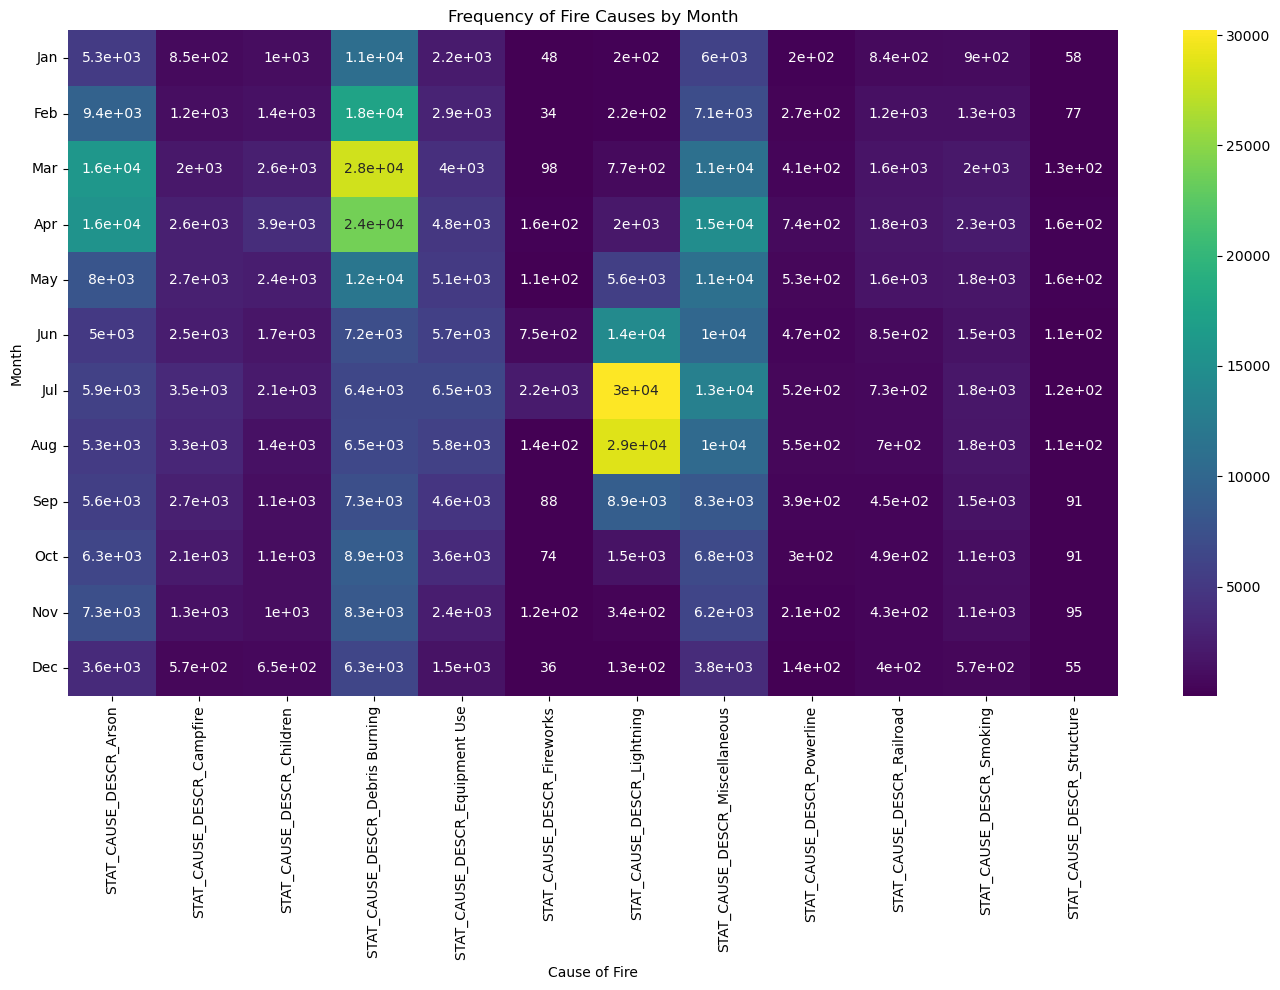

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the necessary data is already loaded and prepared in `wildfire_df`
# Extracting month and encoding 'STAT_CAUSE_DESCR'
wildfire_df['DISCOVERY_MONTH'] = wildfire_df['DISCOVERY_DATE'].dt.month
cause_encoded_df = pd.get_dummies(wildfire_df[['DISCOVERY_MONTH', 'STAT_CAUSE_DESCR']], columns=['STAT_CAUSE_DESCR'])

# Grouping by month and summing to get total occurrences of each cause per month
monthly_causes = cause_encoded_df.groupby('DISCOVERY_MONTH').sum()

# Plotting heatmap of fire causes by month
plt.figure(figsize=(14, 10))
sns.heatmap(monthly_causes, cmap='viridis', annot=True)
plt.title('Frequency of Fire Causes by Month')
plt.xlabel('Cause of Fire')
plt.ylabel('Month')
plt.yticks(ticks=np.arange(0.5, 12.5), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# adding a season feature

In [31]:
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
wildfire_df['Season'] = wildfire_df['DISCOVERY_DATE'].apply(get_season)

In [32]:
wildfire_df.head(10)

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,nearest_holiday,days_from_closest_holiday,DISCOVERY_MONTH,Season
0,0,1464479,201104109,W-626311,FED,DOI-WFMI,BIA,USMTFBA,Fort Belknap Agency,MTFBA,...,PRIVATE,MT,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xf8:p\xce\x88\x12[\...,Labor Day Weekend,12,8,Summer
1,1,1591094,201608816,SFO-NE-2012-16029,NONFED,ST-NASF,ST/C&L,USNENES,Nebraska Department of Forestry,NENFS,...,MISSING/NOT SPECIFIED,NE,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc5PN\xb4\xc5X\...,Memorial Day,9,5,Spring
2,2,944726,1072277,SWRA_VA_11300,NONFED,ST-VAVAS,ST/C&L,USVAVAS,Virginia Department of Forestry,VAVAS3,...,MISSING/NOT SPECIFIED,VA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\x05\xa3\x92:\x91S\...,No Data,No Data,1,Winter
3,3,896277,1022153,SWRA_LA_24392,NONFED,ST-LALAS,ST/C&L,USLALAS,Louisiana Office of Forestry,LALAS1,...,MISSING/NOT SPECIFIED,LA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xe8\xc09#JwV\xc0\xf...,No Data,No Data,5,Spring
4,4,1269039,1673620,SFO-KY-20320089011,NONFED,ST-NASF,ST/C&L,USKYKYS,Kentucky Division of Forestry,KYKYS,...,MISSING/NOT SPECIFIED,KY,Rockcastle,203.0,Rockcastle,b'\x00\x01\xad\x10\x00\x00\xdc\x10\xaa\xd4\xec...,Eastern Easter,9,4,Spring
5,5,1453845,20009452,MOSFM-11020,NONFED,ST-MOMOS,ST/C&L,USMOMOS,Missouri Department of Conservation,00506,...,PRIVATE,MO,BARRY,9.0,Barry,b'\x00\x01\xad\x10\x00\x00\x10\xb8u7O\xbbW\xc0...,No Data,No Data,11,Fall
6,6,832173,953407,STATE_MS_93764,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MS South Central,...,MISSING/NOT SPECIFIED,MS,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xc0\xb1.n\xa3QV\xc0...,No Data,No Data,5,Spring
7,7,500074,537645,SFO-MN0349-920122,NONFED,ST-NASF,ST/C&L,USMNMNS,Minnesota Department of Natural Resources,MNMNS,...,MISSING/NOT SPECIFIED,MN,Mille Lacs,95.0,Mille Lacs,b'\x00\x01\xad\x10\x00\x00Hj\x91\x82adW\xc0\xe...,No Data,No Data,10,Fall
8,8,5332,5356,FS-1429214,FED,FS-FIRESTAT,FS,USMNSUF,Superior National Forest,0909,...,USFS,MN,31,31.0,Cook,b'\x00\x01\xad\x10\x00\x00\xcc\xb9\xc2X\xf2\xb...,4th of July,25,7,Summer
9,9,554703,596457,SFO-NJ0285-99_A051506,NONFED,ST-NASF,ST/C&L,USNJNJS,New Jersey Forest Fire Service,NJNJA,...,MISSING/NOT SPECIFIED,NJ,Passaic,31.0,Passaic,b'\x00\x01\xad\x10\x00\x00\x140\x81[w\x9fR\xc0...,No Data,No Data,5,Spring


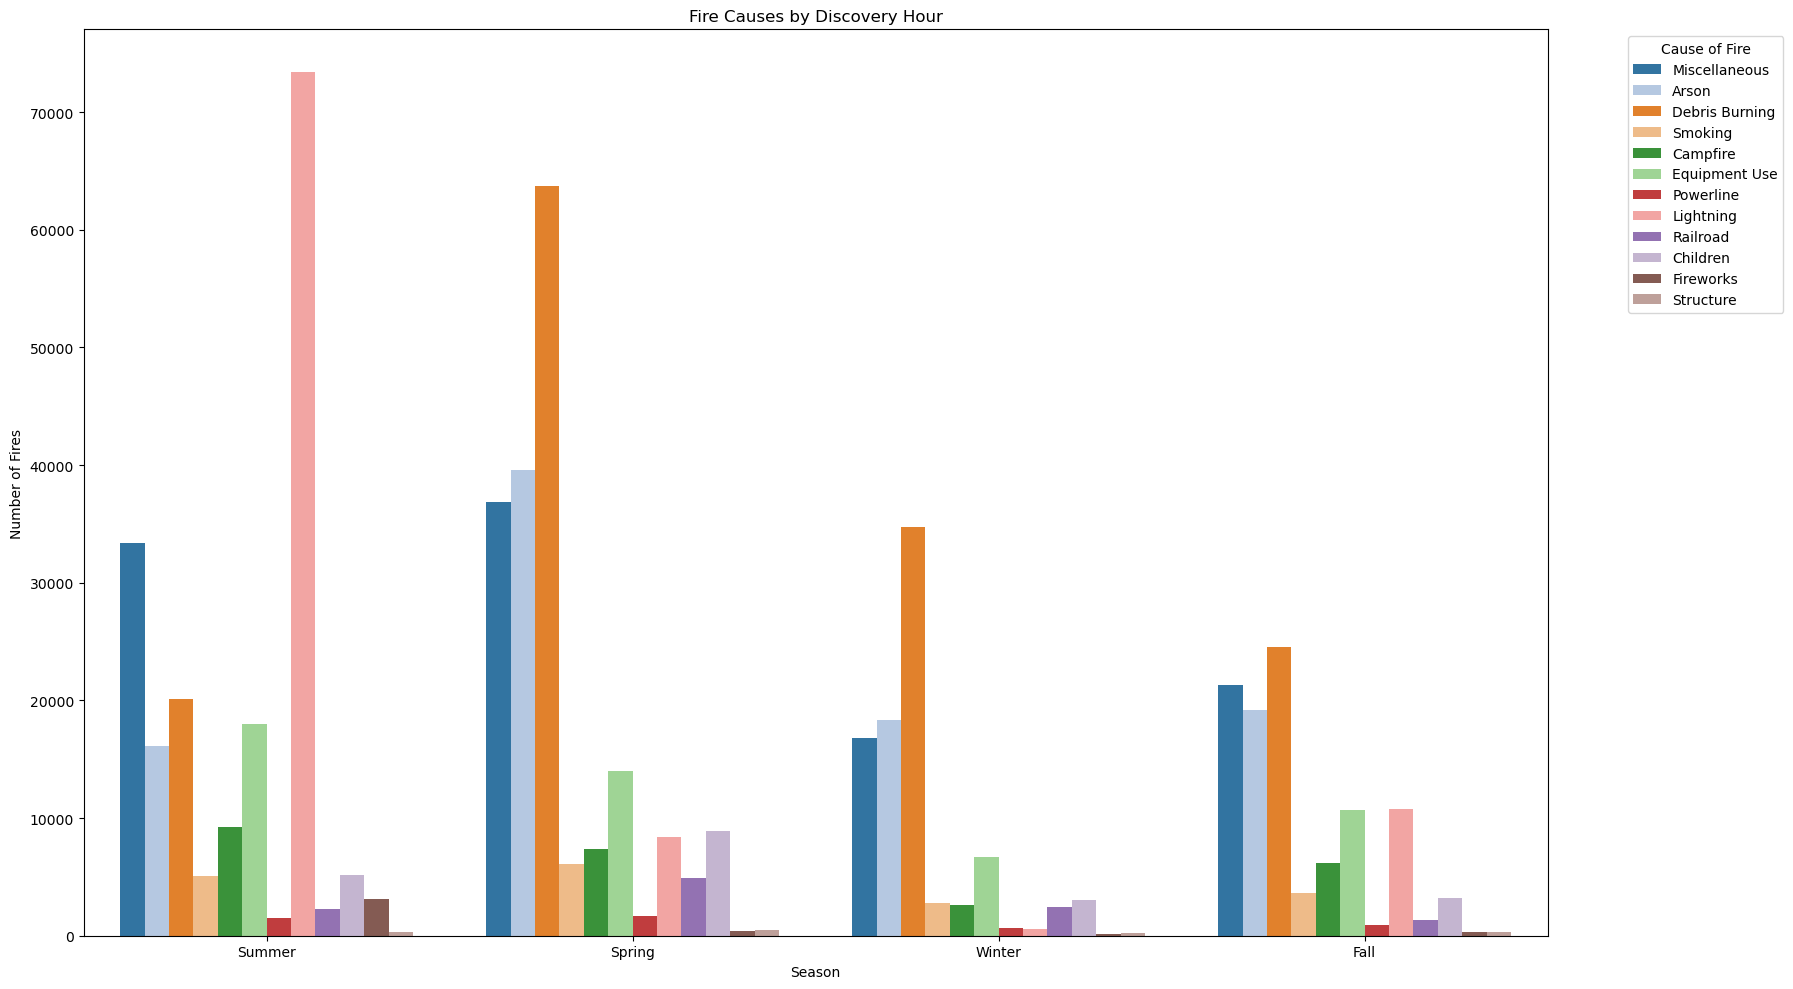

In [36]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Season', hue='STAT_CAUSE_DESCR', data=wildfire_df, palette='tab20')
plt.title('Fire Causes by Discovery Hour')
plt.xlabel('Season')
plt.ylabel('Number of Fires')
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(range(0, 4), labels=[f"{season}" for season in range(0, 4)])
plt.tight_layout()
plt.show()

In [ ]:
# summer and close to nature may be lightning